<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Minería-de-Datos-(Master-en-Data-Science,-UIMP-UC)" data-toc-modified-id="Minería-de-Datos-(Master-en-Data-Science,-UIMP-UC)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Minería de Datos (Master en Data Science, UIMP-UC)</a></span></li><li><span><a href="#Tarea-1.-Variables-Categóricas:-Reglas-de-Asociación-y-Árboles-de-Clasificación" data-toc-modified-id="Tarea-1.-Variables-Categóricas:-Reglas-de-Asociación-y-Árboles-de-Clasificación-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tarea 1. Variables Categóricas: Reglas de Asociación y Árboles de Clasificación</a></span><ul class="toc-item"><li><span><a href="#[Profesores:-Joaquín-Bedia,-Rodrigo-García-y--Sixto-Herrera]" data-toc-modified-id="[Profesores:-Joaquín-Bedia,-Rodrigo-García-y--Sixto-Herrera]-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>[Profesores: Joaquín Bedia, Rodrigo García y  Sixto Herrera]</a></span></li><li><span><a href="#Punto-1-(3-puntos):" data-toc-modified-id="Punto-1-(3-puntos):-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Punto 1 (3 puntos):</a></span></li><li><span><a href="#Punto-2-(4-puntos):" data-toc-modified-id="Punto-2-(4-puntos):-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Punto 2 (4 puntos):</a></span></li><li><span><a href="#Punto-3-(3-puntos):" data-toc-modified-id="Punto-3-(3-puntos):-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Punto 3 (3 puntos):</a></span></li></ul></li></ul></div>

## Minería de Datos (Master en Data Science, UIMP-UC) 
## Tarea 1. Variables Categóricas: Reglas de Asociación y Árboles de Clasificación
### [Profesores: Joaquín Bedia, Rodrigo García, Ana Casanueva y  Sixto Herrera]

En la presente tarea consideraremos el dataset `Mushroom`, incluido tanto en la La librería [arulesViz](https://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf) como en las diferentes plataformas descritas en el marco de la asignatura y en el GitHub dedicado a este Máster ([Mushroom](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/mushrooms.csv.)), para aplicar las diferentes técnicas vistas en el curso para variables categóricas: Reglas de Asociación y Árboles de Clasificación.

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el/la alumn@ durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

Considerar uno de los algoritmos de asociación vistos en clase y obtener las reglas representativas del dataset fijando los parámetros de aprendizaje (soporte, confianza, etc...). Analizar los resultados en términos generales:
* ¿Cuantas reglas se han generado?
* ¿Existe alguna regla redundante?, ¿Cuántas?
* ¿Existe alguna regla que incluya la variable objetivo: `Class=edible` ó `Class=poisonous`?, ¿Cuantas?
* De cara a ser utilizada como modelo predictivo es adecuado que la variable objetivo se encuentre en el consecuente de la regla de asociación, ¿se da esta propiedad en alguna regla?
* Considerar los subconjuntos de reglas con ambas clases como consecuente e ilustrar las variables implicadas en cada caso. Considerar alguno de los grafos vistos para apoyar las conclusiones obtenidas.

NOTA: Usar soportes superiores a 0.1 para evitar problemas de memoria.

In [22]:
library(caret)
library(arules)
library(arulesViz)
library(tree)
library(rpart)
library(ISLR)

In [2]:
data(Mushroom)

In [3]:
rApriori <- apriori(Mushroom, parameter = list(supp = 0.35, conf = 0.8, target = "rules", minlen = 1))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.35      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2843 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [23 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [3303 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Analizamos los resultados:

In [4]:
print(paste0("Número de reglas:",length(rApriori)))
print(paste0("Número de reglas redundantes:",length(which(is.redundant(rApriori)))))

[1] "Número de reglas:3303"
[1] "Número de reglas redundantes:3091"


In [5]:
#filtramos reglas redundantes
rFilt <- rApriori[!is.redundant(rApriori)]
rClass <- subset(rFilt, subset = items %in% c("Class=edible","Class=poisonous"))
print(paste0("Número de reglas que tienen la variable Class (sin redundancia):",length(rClass)))

[1] "Número de reglas que tienen la variable Class (sin redundancia):48"


Reglas con la variable Class en el consecuente:

In [6]:
rhsClass <- subset(rClass, subset = rhs %in% c("Class=edible","Class=poisonous"))
print(paste0("Número de reglas que tienen la variable Class a la derecha:",length(rhsClass)))

[1] "Número de reglas que tienen la variable Class a la derecha:16"


Usamos una matriz de asociaciones para ver las relaciones entre variables para las reglas del conjunto rhsClass:

Itemsets in Antecedent (LHS)
 [1] "{Bruises=no,GillAttached=free,GillSpace=close,RingNumber=one}"   
 [2] "{Bruises=no,GillSpace=close,VeilColor=white,RingNumber=one}"     
 [3] "{Bruises=no,GillSpace=close,VeilColor=white}"                    
 [4] "{Bruises=no,GillAttached=free,GillSpace=close}"                  
 [5] "{Odor=none,RingNumber=one}"                                      
 [6] "{Odor=none,GillSize=broad}"                                      
 [7] "{Bruises=no,GillSpace=close,RingNumber=one}"                     
 [8] "{Bruises=no,GillSpace=close}"                                    
 [9] "{Odor=none,VeilColor=white}"                                     
[10] "{Odor=none}"                                                     
[11] "{GillSize=broad,SurfaceAboveRing=smooth,RingNumber=one}"         
[12] "{GillSize=broad,SurfaceAboveRing=smooth,SurfaceBelowRing=smooth}"
[13] "{GillSize=broad,SurfaceAboveRing=smooth}"                        
[14] "{GillSize=broad,SurfaceBelowR

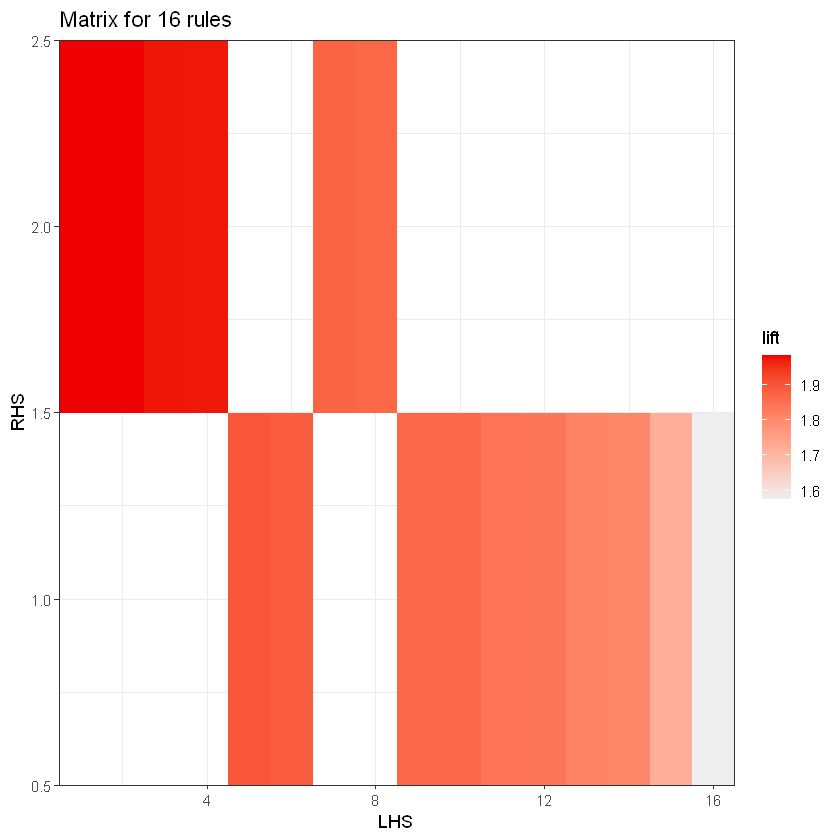

In [7]:
plot(rhsClass, method = "matrix", measure="lift")

La gráfica muestra, para un itemset en el LHS determinado, cuánta correlación hay con que la seta sea comestible o no. Los itemsets 1 a 4, 7 y 8 están relacionados con setas venenosas con un lift de 1.8 aproximadamente o más. El resto de características se relacionan más con setas comestibles.

### Punto 2 (4 puntos):

En este apartado aplicaremos árboles de clasificación para obtener un modelo que permita clasificar una nueva entrada. Para ello, vamos a utilizar el paquete `CaReT`. Este paquete (y los demás que hemos visto para trabajar con árboles en `R`) no aceptan objetos del tipo `transactions` como los del apartado anterior. Por tanto, hemos preparado un fichero *csv* con el dataset *Mushrooms*; puedes descargarlo desde esta aquí:
https://github.com/SantanderMetGroup/Master-Data-Science/tree/master/Data_mining/datasets. Puedes leer este dataset con la función `read.csv`.  
Ahora ya tenemos un data.frame con el que podemos empezar a trabajar. En primer lugar tendremos que eliminar la columna 17 (`veil.type`), ya que contiene un único nivel y daría errores en `CaReT`(esta columna podría eliminarse también en el caso de las reglas de asociación ya que no aporta información al dataset).  
Nuestro objetivo será encontrar la configuración (profundidad) óptima del árbol. Para ello, dividiremos el dataset en dos subconjuntos indpendedientes de train y test (75% y 25% del total, respectivamente). Sobre el dataset de train, aplicaremos una cross-validación con 3 folds y la repetiremos 50 veces (recuerda que los árboles son sensibles a la partición train/test que se considere). 

* ¿Cuál es la configuración óptima del árbol? ¿Hay alguna diferencia entre el árbol *completo* y el óptimo? ¿Por qué crees que ocurre esto?
* ¿Cuáles son las dos variables que mayor peso tienen a la hora de clasificar? Entrena un nuevo árbol considerando como predictores únicamente esas dos variables. ¿Qué resultados obtienes? 
* Entrena un nuevo árbol considerando como predictores cualesquiera otras dos variables que no sean las utilizadas en la pregunta anterior. ¿Cuál es el error de test de este árbol?

#### 

In [8]:
acc.class = function(x, y) {
   stopifnot(length(x) == length(y))
   sum(diag(table(x, y)))/length(x)
}

In [9]:
dataset <- read.csv("mushrooms.csv",header=T,sep=",")

In [10]:
dataset <- subset(dataset, select = -veil.type )

In [11]:
n = nrow(dataset)
set.seed(25)
idtrain = sample(1:n, round(n*0.75))
trainds = dataset[idtrain, ]
testds = dataset[-idtrain, ]

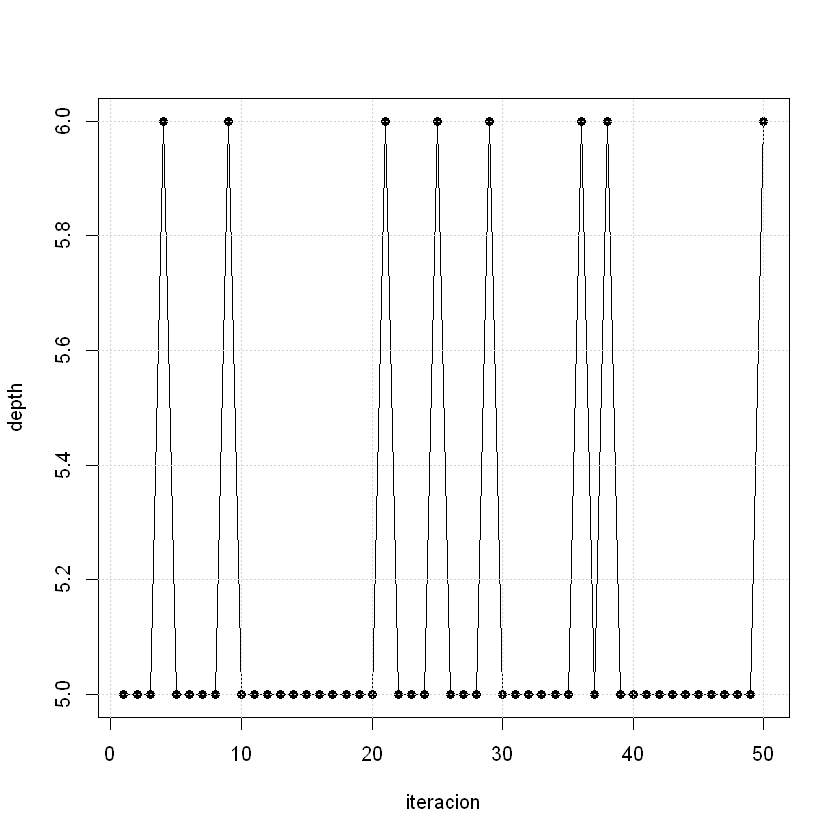

In [12]:
#búsqueda profundidad óptima
trctrl = trainControl(method = "cv", number = 3)
md = 1:10
depth = rep(NA, length(md))

for (i in 1:50) {
  t = train(class ~ ., data = trainds,
            method = "rpart2",
            trControl = trctrl,
            tuneGrid = expand.grid(maxdepth = md))
  depth[i] = t$bestTune$maxdepth
}

plot(1:50, depth, type = "o", pch = 19, xlab = "iteracion") 
grid()

In [13]:
print(paste0("Profundidad óptima:",round(mean(depth))))

[1] "Profundidad óptima:5"


Tomamos una profundidad óptima de 5 y vemos las diferencias con el árbol ajustado totalmente:

In [14]:
#arbol completo
ntrain <-length(trainds[,1])
trainfac<- as.data.frame(lapply(trainds, as.factor))
testfac <-as.data.frame(lapply(testds, as.factor))
ctrl <- tree.control(nobs=ntrain,minsize = 2, mincut =1,mindev=0)
ct <- tree(class ~ ., data = trainfac, control = ctrl)
nodes <- as.numeric(rownames(ct$frame))
maxdepth<-max(rpart:::tree.depth(nodes))
print(paste0("profundidad máxima del árbol completo:", maxdepth))

[1] "profundidad máxima del árbol completo:6"


In [15]:
est.ct.train<- predict(ct, trainfac,type= "class")
acc.est.ct.train <- acc.class(est.ct.train, trainfac$class)


est.ct.test<- predict(ct, testfac,type= "class")
acc.est.ct.test <- acc.class(est.ct.test, testfac$class)

print(paste0("Accuracy del ct con train:",acc.est.ct.train))
print(paste0("Accuracy del ct con test:",acc.est.ct.test))

[1] "Accuracy del ct con train:1"
[1] "Accuracy del ct con test:1"


In [16]:
#árbol óptimo
ctrl <- rpart.control(minsplit = 2,minbucket = 1, cp=0,maxdepth=5)
ot <- rpart(class ~ ., data = trainfac, control = ctrl)

In [17]:
est.ot.train<- predict(ot, trainds, type= "class")
acc.est.ot.train <- acc.class(est.ot.train, trainds$class)

est.ot.test<- predict(ot, testds, type= "class")
acc.est.ot.test <- acc.class(est.ot.test, testds$class)



print(paste0("Accuracy del ot con train:",acc.est.ot.train))
print(paste0("Accuracy del ot con test:",acc.est.ot.test))

[1] "Accuracy del ot con train:0.997374035778762"
[1] "Accuracy del ot con test:0.998030526834072"


Comentarios: tanto el árbol completo como el árbol óptimo evaluados sobre el conjunto de test tienen un error nulo o casi nulo. Esto indica que el conjunto de test está representado sin error por el conjunto de train. Aunque se esperaría algún error de test en el árbol completo, debido a un posible sobreajuste, el hecho de que la profundidad del árbol completo esté muy cerca de la óptima podría explicar el resultado tan preciso. 

#### 

In [18]:
variable_importance <- ot$variable.importance
print(variable_importance)
#nuevo arbol con variables mas importantes
ctrl <- rpart.control(minsplit = 2,minbucket = 1, cp=0,maxdepth=5)
ot2 <- rpart(class ~ odor + spore.print.color, data = trainds,control = ctrl)

                    odor        spore.print.color               gill.color 
             2870.344904              2114.518142              1711.143565 
stalk.surface.below.ring                ring.type stalk.surface.above.ring 
             1530.984385              1516.938656              1512.925591 
  stalk.color.below.ring   stalk.color.above.ring               veil.color 
               35.367330                13.753962                13.753962 
             cap.surface                cap.shape 
                5.933740                 1.964852 


In [19]:
est.ot2.train<- predict(ot2, trainds, type = "class")
acc.est.ot2.train <- acc.class(est.ot2.train, trainds$class)

est.ot2.test<- predict(ot2, testds, type= "class")
acc.est.ot2.test <- acc.class(est.ot2.test, testds$class)


print(paste0("Accuracy del ot2 con train:",acc.est.ot2.train))
print(paste0("Accuracy del ot2 con test:",acc.est.ot2.test))

[1] "Accuracy del ot2 con train:0.993927457738388"
[1] "Accuracy del ot2 con test:0.994583948793698"


La predicción de la variable class mantiene la tasa de aciertos alta solo con dos variables predictoras.

#### 


In [20]:
ctrl <- rpart.control(minsplit = 2,minbucket = 1, cp=0,maxdepth=5)
ot3 <- rpart(class ~ ring.type + stalk.surface.above.ring, data = trainds, control = ctrl)

est.ot3.test<- predict(ot3, testds, type= "class")
acc.est.ot3.test <- acc.class(est.ot3.test, testds$class)

print(paste0("Error de test:",(1-acc.est.ot3.test)*100," %"))

[1] "Error de test:15.4603643525357 %"


La tasa de error aumenta, al estar el árbol creado a partir de predictores menos importantes.

### Punto 3 (3 puntos):

Por un lado, las ramas del árbol pueden ser interpretadas como reglas de forma similar a las obtenidas por el algoritmo de reglas aplicado. Por ejemplo, en el caso del árbol obtenido con el dataset `Play Tennis` puede obtenerse las siguientes `reglas`: SI Outlook = Overcast -> Play Tennis = Yes ó SI (Outlook = Sunny) AND (Humidity = Normal) -> Play Tennis = Yes, cuya confianza asociada viene dada por la frecuencia relativa de cada caso en esa rama del árbol. Por otro lado, considerando las reglas que implican a nuestra variable objetivo tendríamos un `modelo` similar al dado por el árbol. Considerar y comparar ambas aproximaciones (p.e. ¿coinciden los antecedentes de las reglas? ¿alguna de las variables más frecuentes como antecedente en las reglas se corresponde con alguna de las variables con mayor capacidad de discriminación? etc.). 

#### Comentarios
Comparamos las variables de más capacidad de separación en el árbol con los antecedentes de las reglas. Aquellas con más influencia en ambas son: odor, 
stalk.surface.below.rinype stalk.surface.above.ri

La probabilidad de acierto de una regla viene dada por la confianza. Atendiendo a la confianza de las reglas de rhsClass podemos obtener información sobre el rendimiento de ese modelo y compararlo con los árboles obtenidos en los otros apartados..

In [21]:
conf <- interestMeasure(rhsClass, c("confidence"), Mushroom)
print(paste0("Máxima confianza de las reglas:", max(conf)))

[1] "Máxima confianza de las reglas:0.983606557377049"


Las reglas con las que podemos predecir la variable Class tienen una confianza menor o igual al 98%. Por tanto, aunque en algunos casos las reglas aportan casi tanta precisión como los árboles óptimos, en general un árbol permite predecir con más exactitud (accuracy de ot 0.997 en train y 0.998 en test).